<a href="https://colab.research.google.com/github/MarkH0705/MarkH0705/blob/main/Abrechnungen_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Datei einlesen
file_path = '/content/drive/MyDrive/Colab Notebooks/Abrechnungen/Beispieltable_complaints.xlsx'
data = pd.read_excel(file_path)

# Erste Zeilen und Spalteninformationen anzeigen
data_info = {
    "head": data.head(),
    "columns": data.columns.tolist(),
    "info": data.info()
}
data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tabelle 1    4 non-null      object
 1   Unnamed: 1   4 non-null      object
 2   Unnamed: 2   4 non-null      object
 3   Unnamed: 3   4 non-null      object
 4   Unnamed: 4   4 non-null      object
 5   Unnamed: 5   4 non-null      object
 6   Unnamed: 6   4 non-null      object
 7   Unnamed: 7   4 non-null      object
 8   Unnamed: 8   4 non-null      object
 9   Unnamed: 9   4 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  4 non-null      object
 12  Unnamed: 12  4 non-null      object
 13  Unnamed: 13  4 non-null      object
 14  Unnamed: 14  4 non-null      object
 15  Unnamed: 15  4 non-null      object
dtypes: object(16)
memory usage: 640.0+ bytes


{'head':   Tabelle 1          Unnamed: 1  Unnamed: 2  \
 0      VKNR  Abrechnungsquartal        BSNR   
 1     72305               20224  2730566600   
 2      0211               20241  2430366330   
 3      1230               20234  2739966600   
 
                                           Unnamed: 3 Unnamed: 4   Unnamed: 5  \
 0                                               LANR        EGK     Nachname   
 1                 1148560934, 1148560934, 1148560934  N34958392       Müller   
 2                                         1346660900  Y34976392      Schulte   
 3  1148280774, 1148280774, 1358280711, 1358280711...  A34908322  von Bismark   
 
   Unnamed: 6    Unnamed: 7  Unnamed: 8 Unnamed: 9         Unnamed: 10  \
 0    Vorname  Geburtsdatum  Geschlecht        GOP  Anzahl_abgerechnet   
 1      Erwin     21.4.1933           m     92012D                   4   
 2       Jana    03.11.2001           w      01011                   1   
 3       Otto     21.4.1988           d     339

In [4]:
# Erste Zeile als Header verwenden und die Daten bereinigen
cleaned_data = pd.read_excel(file_path, header=1)

# Spalten überprüfen und sicherstellen, dass überflüssige Zeilen entfernt werden
cleaned_data.columns = [
    "VKNR", "Abrechnungsquartal", "BSNR", "LANR", "EGK", "Nachname",
    "Vorname", "Geburtsdatum", "Geschlecht", "GOP", "Anzahl_abgerechnet",
    "Anzahl_beanstandet", "BHT_abgerechnet", "BHT_beanstandet",
    "Begründung_KK", "Anzahl_anerkannt"
]

# Überflüssige leere Zeilen entfernen
cleaned_data = cleaned_data.dropna(how='all')

# Resultierende Datenstruktur anzeigen
cleaned_data.head()


,VKNR,Abrechnungsquartal,BSNR,LANR,EGK,Nachname,Vorname,Geburtsdatum,Geschlecht,GOP,Anzahl_abgerechnet,Anzahl_beanstandet,BHT_abgerechnet,BHT_beanstandet,Begründung_KK,Anzahl_anerkannt
0,72305,20224,2730566600,"1148560934, 1148560934, 1148560934",N34958392,Müller,Erwin,21.4.1933,m,92012D,4,1,"12.11.2022, 13.11.2022, 22.11.2022, 24.12.2022","2.11.2022, 24.12.2022",nur 2x im Quartal,2
1,211,20241,2430366330,1346660900,Y34976392,Schulte,Jana,03.11.2001,w,01011,1,1,01.03.2024,01.03.2024,falsches Geschlecht,1
2,1230,20234,2739966600,"1148280774, 1148280774, 1358280711, 1358280711...",A34908322,von Bismark,Otto,21.4.1988,d,33982A,5,3,"16.10.2023, 26.11.2023, 02.12.2023, 11.12.2023...","2.12.2023, 11.12.2023, 21.12.2023",Falscher FGC,3


In [5]:
# Umwandlung der zeitlichen Daten und Extraktion der Fachgruppe

# Spalte "Abrechnungsquartal" in Jahr und Quartal aufteilen
cleaned_data['Jahr'] = cleaned_data['Abrechnungsquartal'].astype(str).str[:-1].astype(int)
cleaned_data['Quartal'] = cleaned_data['Abrechnungsquartal'].astype(str).str[-1].astype(int)

# Behandlungstage in Datumsformate umwandeln
cleaned_data['BHT_abgerechnet'] = cleaned_data['BHT_abgerechnet'].apply(
    lambda x: [pd.to_datetime(date.strip(), format="%d.%m.%Y") for date in x.split(',')]
)
cleaned_data['BHT_beanstandet'] = cleaned_data['BHT_beanstandet'].apply(
    lambda x: [pd.to_datetime(date.strip(), format="%d.%m.%Y") for date in x.split(',')]
)

# Quartalsdauer (Differenz zwischen frühestem und spätestem Tag)
cleaned_data['Quartalsdauer'] = cleaned_data['BHT_abgerechnet'].apply(
    lambda dates: (max(dates) - min(dates)).days if dates else None
)

# Fachgruppe aus LANR extrahieren (letzte 2 Ziffern)
cleaned_data['Fachgruppe'] = cleaned_data['LANR'].str.split(',').str[0].str.strip().str[-2:]

# Resultierende Tabelle anzeigen
cleaned_data[['VKNR', 'Jahr', 'Quartal', 'BHT_abgerechnet', 'BHT_beanstandet', 'Quartalsdauer', 'Fachgruppe']].head()


,VKNR,Jahr,Quartal,BHT_abgerechnet,BHT_beanstandet,Quartalsdauer,Fachgruppe
0,72305,2022,4,"[2022-11-12 00:00:00, 2022-11-13 00:00:00, 202...","[2022-11-02 00:00:00, 2022-12-24 00:00:00]",42,34
1,211,2024,1,[2024-03-01 00:00:00],[2024-03-01 00:00:00],0,00
2,1230,2023,4,"[2023-10-16 00:00:00, 2023-11-26 00:00:00, 202...","[2023-12-02 00:00:00, 2023-12-11 00:00:00, 202...",66,74


In [6]:
from datetime import datetime

# Geburtsdatum in ein standardisiertes Datumsformat umwandeln
cleaned_data['Geburtsdatum'] = pd.to_datetime(cleaned_data['Geburtsdatum'], format="%d.%m.%Y", errors='coerce')

# Funktion zur Berechnung des Alters an jedem Behandlungstag
def calculate_age_on_dates(birth_date, treatment_dates):
    if pd.isnull(birth_date) or not treatment_dates:
        return None
    return [(date - birth_date).days // 365 for date in treatment_dates]

# Alter an den Behandlungstagen berechnen
cleaned_data['Alter_an_BHT'] = cleaned_data.apply(
    lambda row: calculate_age_on_dates(row['Geburtsdatum'], row['BHT_abgerechnet']), axis=1
)

# Repräsentatives Alter am ersten Behandlungstag hinzufügen
cleaned_data['Alter_erster_BHT'] = cleaned_data['Alter_an_BHT'].apply(
    lambda ages: ages[0] if ages else None
)

# Ergebnisse anzeigen
cleaned_data[['Nachname', 'Geburtsdatum', 'BHT_abgerechnet', 'Alter_an_BHT', 'Alter_erster_BHT']].head()


,Nachname,Geburtsdatum,BHT_abgerechnet,Alter_an_BHT,Alter_erster_BHT
0,Müller,1933-04-21,"[2022-11-12 00:00:00, 2022-11-13 00:00:00, 202...","[89, 89, 89, 89]",89
1,Schulte,2001-11-03,[2024-03-01 00:00:00],[22],22
2,von Bismark,1988-04-21,"[2023-10-16 00:00:00, 2023-11-26 00:00:00, 202...","[35, 35, 35, 35, 35]",35


In [7]:
# Beispielregeln für GOP-Alter- und Geschlechts-Validität
gop_rules = {
    '92012D': {'min_age': 18, 'max_age': None, 'valid_genders': ['m', 'w']},
    '01011': {'min_age': None, 'max_age': None, 'valid_genders': ['m']},
    '33982A': {'min_age': None, 'max_age': None, 'valid_genders': ['m', 'w', 'd']}
}

# Funktion zur Validierung des Alters für eine GOP
def validate_gop_age(gop, age):
    if gop not in gop_rules or age is None:
        return None
    rule = gop_rules[gop]
    min_age = rule['min_age'] if rule['min_age'] is not None else 0
    max_age = rule['max_age'] if rule['max_age'] is not None else float('inf')
    return min_age <= age <= max_age

# Funktion zur Validierung des Geschlechts für eine GOP
def validate_gop_gender(gop, gender):
    if gop not in gop_rules or gender is None:
        return None
    return gender in gop_rules[gop]['valid_genders']

# GOP-Alter-Validität und Geschlechts-Validität berechnen
cleaned_data['GOP_Alter_valid'] = cleaned_data.apply(
    lambda row: all(validate_gop_age(row['GOP'], age) for age in row['Alter_an_BHT'])
    if row['Alter_an_BHT'] else None, axis=1
)

cleaned_data['GOP_Geschlecht_valid'] = cleaned_data.apply(
    lambda row: validate_gop_gender(row['GOP'], row['Geschlecht']), axis=1
)

# Ergebnisse anzeigen
cleaned_data[['Nachname', 'GOP', 'Alter_erster_BHT', 'Geschlecht', 'GOP_Alter_valid', 'GOP_Geschlecht_valid']].head()


,Nachname,GOP,Alter_erster_BHT,Geschlecht,GOP_Alter_valid,GOP_Geschlecht_valid
0,Müller,92012D,89,m,True,True
1,Schulte,01011,22,w,True,False
2,von Bismark,33982A,35,d,True,True


In [12]:
# Anpassung für neuere Versionen von scikit-learn
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
gender_encoded = one_hot_encoder.fit_transform(cleaned_data[['Geschlecht']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=one_hot_encoder.get_feature_names_out(['Geschlecht']))

# Label-Encoding für 'VKNR', 'BSNR', 'GOP', und 'Fachgruppe'
label_encoder_vknr = LabelEncoder()
label_encoder_bsnr = LabelEncoder()
label_encoder_gop = LabelEncoder()
label_encoder_fachgruppe = LabelEncoder()

cleaned_data['VKNR_encoded'] = label_encoder_vknr.fit_transform(cleaned_data['VKNR'].astype(str))
cleaned_data['BSNR_encoded'] = label_encoder_bsnr.fit_transform(cleaned_data['BSNR'].astype(str))
cleaned_data['GOP_encoded'] = label_encoder_gop.fit_transform(cleaned_data['GOP'].astype(str))
cleaned_data['Fachgruppe_encoded'] = label_encoder_fachgruppe.fit_transform(cleaned_data['Fachgruppe'].astype(str))

# Aktualisierte Tabelle mit kodierten Variablen
encoded_data = pd.concat([cleaned_data, gender_encoded_df], axis=1)
encoded_data.head()



,VKNR,Abrechnungsquartal,BSNR,LANR,EGK,Nachname,Vorname,Geburtsdatum,Geschlecht,GOP,...,Alter_erster_BHT,GOP_Alter_valid,GOP_Geschlecht_valid,VKNR_encoded,BSNR_encoded,GOP_encoded,Fachgruppe_encoded,Geschlecht_d,Geschlecht_m,Geschlecht_w
0,72305,20224,2730566600,"1148560934, 1148560934, 1148560934",N34958392,Müller,Erwin,1933-04-21,m,92012D,...,89,True,True,2,1,2,1,0.0,1.0,0.0
1,211,20241,2430366330,1346660900,Y34976392,Schulte,Jana,2001-11-03,w,01011,...,22,True,False,1,0,0,0,0.0,0.0,1.0
2,1230,20234,2739966600,"1148280774, 1148280774, 1358280711, 1358280711...",A34908322,von Bismark,Otto,1988-04-21,d,33982A,...,35,True,True,0,2,1,2,1.0,0.0,0.0


In [14]:
# Numerische Features
numerical_features = [
    'Alter_erster_BHT', 'Quartalsdauer', 'Anzahl_abgerechnet',
    'Anzahl_beanstandet', 'GOP_Alter_valid', 'GOP_Geschlecht_valid'
]

# Kategorische Features (Label-Encoded)
categorical_features = [
    'VKNR_encoded', 'BSNR_encoded', 'GOP_encoded', 'Fachgruppe_encoded'
]

# One-Hot-Encoded Features
one_hot_features = ['Geschlecht_m', 'Geschlecht_w', 'Geschlecht_d']


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model

# Eingabeschichten
numerical_inputs = Input(shape=(len(numerical_features),), name="numerical_inputs")
categorical_inputs = Input(shape=(len(categorical_features),), name="categorical_inputs")
one_hot_inputs = Input(shape=(len(one_hot_features),), name="one_hot_inputs")

# Embeddings für kategorische Features
embedding_size = 8  # Embedding-Größe anpassen
embedded = Embedding(input_dim=100, output_dim=embedding_size)(categorical_inputs)  # Passe input_dim an
embedded = Flatten()(embedded)

# Verarbeitung der numerischen Features
numerical_dense = Dense(64, activation='relu')(numerical_inputs)

# Verarbeitung der One-Hot-Features
one_hot_dense = Dense(32, activation='relu')(one_hot_inputs)

# Kombination der Pfade
combined = Concatenate()([numerical_dense, embedded, one_hot_dense])

# Weiteres Dense-Layer
combined_dense = Dense(128, activation='relu')(combined)

# Output Layer
output = Dense(1, activation='linear', name="output")(combined_dense)

# Modell erstellen
model = Model(inputs=[numerical_inputs, categorical_inputs, one_hot_inputs], outputs=output)

# Modell zusammenfassen
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ categorical_inputs        │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_inputs          │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 4, 8)           │            800 │ categorical_inputs[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ one_hot_inputs            │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            448 │ numerical_inputs[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 32)             │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │            128 │ one_hot_inputs[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128)            │              0 │ dense[0][0],           │
│                           │                        │                │ flatten[0][0],         │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         16,512 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │            129 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 18,017 (70.38 KB)

 Trainable params: 18,017 (70.38 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

# Definieren der Features
numerical_features = [
    'Alter_erster_BHT', 'Quartalsdauer', 'Anzahl_abgerechnet',
    'Anzahl_beanstandet', 'GOP_Alter_valid', 'GOP_Geschlecht_valid'
]
categorical_features = [
    'VKNR_encoded', 'BSNR_encoded', 'GOP_encoded', 'Fachgruppe_encoded'
]
one_hot_features = ['Geschlecht_m', 'Geschlecht_w', 'Geschlecht_d']

# Zielvariable
target_feature = 'Anzahl_anerkannt'

# Daten in numpy-Arrays umwandeln
X_numerical = encoded_data[numerical_features].values
X_categorical = encoded_data[categorical_features].values
X_one_hot = encoded_data[one_hot_features].values
y = encoded_data[target_feature].values

# Aufteilen in Training und Test
X_train_num, X_test_num, X_train_cat, X_test_cat, X_train_oh, X_test_oh, y_train, y_test = train_test_split(
    X_numerical, X_categorical, X_one_hot, y, test_size=0.2, random_state=42)

# Datenstruktur prüfen
X_train_num.shape, X_train_cat.shape, X_train_oh.shape, y_train.shape


((2, 6), (2, 4), (2, 3), (2,))

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model


# Konvertierung der Daten in float32
X_train_num = X_train_num.astype('float32')
X_test_num = X_test_num.astype('float32')
X_train_cat = X_train_cat.astype('int32')
X_test_cat = X_test_cat.astype('int32')
X_train_oh = X_train_oh.astype('float32')
X_test_oh = X_test_oh.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

print("X_train_cat dtype:", X_train_cat.dtype)
print("X_train_num dtype:", X_train_num.dtype)
print("X_train_oh dtype:", X_train_oh.dtype)


# Passe den Embedding-Layer an
max_category_value = np.max(X_train_cat) + 1  # Maximaler Wert der Kategorien + 1
embedded = Embedding(input_dim=max_category_value, output_dim=embedding_size)(categorical_inputs)
embedded = Flatten()(embedded)

# Der Rest der Modellarchitektur bleibt unverändert



# Eingabeschichten
numerical_inputs = Input(shape=(X_train_num.shape[1],), name="numerical_inputs")
categorical_inputs = Input(shape=(X_train_cat.shape[1],), name="categorical_inputs")
one_hot_inputs = Input(shape=(X_train_oh.shape[1],), name="one_hot_inputs")

# Embeddings für kategorische Features
embedding_size = 8  # Embedding-Größe anpassen
max_category_value = np.max(X_train_cat) + 1  # Maximaler Wert der Kategorien + 1
embedded = Embedding(input_dim=max_category_value, output_dim=embedding_size)(categorical_inputs)
embedded = Flatten()(embedded)


# Verarbeitung der numerischen Features
numerical_dense = Dense(64, activation='relu')(numerical_inputs)

# Verarbeitung der One-Hot-Features
one_hot_dense = Dense(32, activation='relu')(one_hot_inputs)

# Kombination der Pfade
combined = Concatenate()([numerical_dense, embedded, one_hot_dense])

# Weiteres Dense-Layer
combined_dense = Dense(128, activation='relu')(combined)

# Output Layer
output = Dense(1, activation='linear', name="output")(combined_dense)

# Modell erstellen
model = Model(inputs=[numerical_inputs, categorical_inputs, one_hot_inputs], outputs=output)

# Modell kompilieren
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Modell trainieren
history = model.fit(
    [X_train_num, X_train_cat, X_train_oh], y_train,
    validation_data=([X_test_num, X_test_cat, X_test_oh], y_test),
    epochs=10, batch_size=2
)

# Trainingszusammenfassung anzeigen
history.history



X_train_cat dtype: int32
X_train_num dtype: float32
X_train_oh dtype: float32
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 37.8346 - mae: 4.8767 - val_loss: 3.0694 - val_mae: 1.7520
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 20.2952 - mae: 3.3507 - val_loss: 1.6270 - val_mae: 1.2756
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.7718 - mae: 2.2645 - val_loss: 14.5112 - val_mae: 3.8094
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.5354 - mae: 1.4742 - val_loss: 34.1634 - val_mae: 5.8449
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7198 - mae: 0.6752 - val_loss: 53.1796 - val_mae: 7.2924
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.9239 - mae: 1.3861 - val_loss: 65.3922 - val_mae: 8.0865
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 4.2902 - mae: 1.9706 - val_loss: 68.1687 - val_mae: 8.2564
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.2022 - mae: 2.2575 - val_loss: 62.4675 - val_mae: 7.

{'loss': [37.834590911865234,
  20.295236587524414,
  8.77184772491455,
  2.535365104675293,
  0.7198063135147095,
  1.9239399433135986,
  4.290229797363281,
  6.202189922332764,
  6.869798183441162,
  6.268359661102295],
 'mae': [4.876730918884277,
  3.3506972789764404,
  2.2645151615142822,
  1.4741994142532349,
  0.6751546859741211,
  1.3861111402511597,
  1.9706367254257202,
  2.257488250732422,
  2.277212142944336,
  2.077937126159668],
 'val_loss': [3.069399118423462,
  1.6270281076431274,
  14.51121997833252,
  34.163387298583984,
  53.179630279541016,
  65.3922119140625,
  68.16870880126953,
  62.467491149902344,
  50.81827163696289,
  36.74751281738281],
 'val_mae': [1.7519700527191162,
  1.275550127029419,
  3.809359550476074,
  5.844945430755615,
  7.292436599731445,
  8.08654499053955,
  8.256434440612793,
  7.903637886047363,
  7.128693580627441,
  6.061972618103027]}

In [21]:
# Modell auf Testdaten bewerten
loss, mae = model.evaluate([X_test_num, X_test_cat, X_test_oh], y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 36.7475 - mae: 6.0620
Test Loss: 36.74751281738281
Test MAE: 6.061972618103027


In [22]:
# Vorhersagen erstellen
y_pred = model.predict([X_test_num, X_test_cat, X_test_oh])

# Ergebnisse vergleichen
import pandas as pd
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(results.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
   Actual  Predicted
0     2.0   8.061973


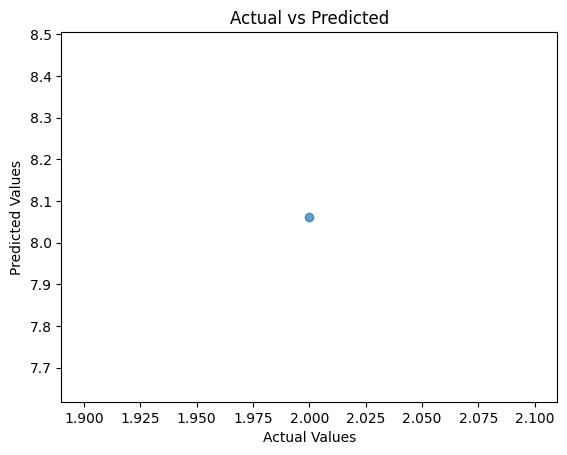

In [23]:
import matplotlib.pyplot as plt

# Scatterplot der tatsächlichen Werte gegen die Vorhersagen
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


In [24]:
# Modell speichern
model.save('model.h5')

# Modell laden (bei Bedarf)
# from tensorflow.keras.models import load_model
# model = load_model('model.h5')
